In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [167]:
df_transactions = pd.read_csv('transactions.csv')
df_transactions['dates'] = pd.to_datetime(df_transactions['dates'])
df_transactions.tail()

,dates,SKU,user,price
1334255,2019-04-21,16663,20223,2240.0
1334256,2019-04-21,16663,25555,2240.0
1334257,2019-04-21,16663,47340,2240.0
1334258,2019-04-21,16663,23762,2240.0
1334259,2019-04-21,16663,48007,2240.0


# Data preparation

In [4]:
import pandas as pd
import numpy as np

import lightgbm as lgb
import requests

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [125]:
def date_to_datetime(df):
    df['year'] = df.dates.dt.year
    df['month'] = df.dates.dt.month
    df['quarter_of_year'] = df.dates.dt.quarter
    df['week_num'] = df.dates.dt.isocalendar().week.astype(int)
    df['day_of_year'] = df.dates.dt.dayofyear
    df['day_of_month'] = df.dates.dt.day
    df['day_of_week'] = df.dates.dt.dayofweek
    df["is_wknd"] = df.dates.dt.weekday // 4
    df['is_month_start'] = df.dates.dt.is_month_start.astype(int)
    df['is_month_end'] = df.dates.dt.is_month_end.astype(int)
#     df = df.drop(columns=['dates'])
    
    return df

In [142]:
df_transactions = pd.read_csv('transactions.csv')
lst_sku = df_transactions.SKU.unique().tolist()

df_transactions['dates'] = pd.to_datetime(df_transactions['dates'])
df_transactions['year'] = df_transactions.dates.dt.year
df_transactions['month'] = df_transactions.dates.dt.month
df_transactions['week_num'] = df_transactions.dates.dt.isocalendar().week.astype(int)
df_transactions = df_transactions.sort_values(by=['year', 'month', 'week_num'])
df_transactions = date_to_datetime(df_transactions)
df_transactions = df_transactions.drop(columns=['user'])
df_transactions = df_transactions.drop_duplicates()
df_transactions

,dates,SKU,price,year,month,week_num,quarter_of_year,day_of_year,day_of_month,day_of_week,is_wknd,is_month_start,is_month_end
110813,2018-01-04,50389,2432.0,2018,1,1,1,4,4,3,0,0,0
110819,2018-01-05,50389,2432.0,2018,1,1,1,5,5,4,1,0,0
110826,2018-01-06,50389,2432.0,2018,1,1,1,6,6,5,1,0,0
110830,2018-01-07,50389,2432.0,2018,1,1,1,7,7,6,1,0,0
217504,2018-01-05,88333,2831.0,2018,1,1,1,5,5,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333054,2019-11-26,91775,1355.0,2019,11,48,4,330,26,1,0,0,0
1333057,2019-11-27,91775,1355.0,2019,11,48,4,331,27,2,0,0,0
1333062,2019-11-28,91775,1355.0,2019,11,48,4,332,28,3,0,0,0
1333065,2019-11-29,91775,1355.0,2019,11,48,4,333,29,4,1,0,0


In [171]:
dec =['2019-12-01', '2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05',
'2019-12-06', '2019-12-07', '2019-12-08', '2019-12-09', '2019-12-10',
'2019-12-11', '2019-12-12', '2019-12-13', '2019-12-14', '2019-12-15',
'2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
'2019-12-21', '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
'2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30']

df_update = pd.DataFrame(lst_sku, columns =['SKU'])
df_update['dates'] = dec[0]
# df_update['dates'] = pd.to_datetime(df_update['dates'])

# df_update['year'] = df_update.dates.dt.year
# df_update['month'] = df_update.dates.dt.month
# df_update['week_num'] = df_update.dates.dt.isocalendar().week.astype(int)

# df_update = date_to_datetime(df_update)
df_update.head()

,SKU,dates
0,16019,2019-12-01
1,39544,2019-12-01
2,85915,2019-12-01


In [187]:
lst_sku = lst_sku[:1]

In [188]:
lst_sku

[16019]

In [189]:
from prophet import Prophet

In [190]:
%%time
from statsmodels.tsa.arima.model import ARIMA
df_test = pd.DataFrame()

for d in range(len(dec)):
#     print(dec[d])
#     df_test = pd.DataFrame()

    df_update = pd.DataFrame(lst_sku, columns =['SKU'])
    df_update['dates'] = dec[d]
    df_update['dates'] = pd.to_datetime(df_update['dates'])

    df_update['year'] = df_update.dates.dt.year
    df_update['month'] = df_update.dates.dt.month
    df_update['week_num'] = df_update.dates.dt.isocalendar().week.astype(int)

    df_update = date_to_datetime(df_update)

    for i in range(len(lst_sku)):     
        print(lst_sku[i])
        df_transactions_ = df_transactions[df_transactions['SKU'] == lst_sku[i]].reset_index(drop=True)
        df_update_ = df_update[df_update['SKU'] == lst_sku[i]]

        prophet = Prophet()
        prophet.fit(df_transactions_[['dates', 'price']].rename(
            columns={'dates':'ds','price':'y'}))

        df_update_ = df_update_.rename(columns={'dates':'ds'})
        df_update_ = df_update_[['SKU', 'ds']]
        df_update_PRED = prophet.predict(
            df_update_[df_update_.SKU == lst_sku[i]])

        df_test = pd.concat([df_test, df_update_PRED])  
        df_transactions = pd.concat([df_transactions, df_update_])   

    #     break

16:41:49 - cmdstanpy - INFO - Chain [1] start processing
16:41:49 - cmdstanpy - INFO - Chain [1] done processing


16019


16:41:49 - cmdstanpy - INFO - Chain [1] start processing
16:41:49 - cmdstanpy - INFO - Chain [1] done processing


16019


16:41:50 - cmdstanpy - INFO - Chain [1] start processing
16:41:50 - cmdstanpy - INFO - Chain [1] done processing


16019


16:41:51 - cmdstanpy - INFO - Chain [1] start processing
16:41:51 - cmdstanpy - INFO - Chain [1] done processing


16019


16:41:52 - cmdstanpy - INFO - Chain [1] start processing
16:41:52 - cmdstanpy - INFO - Chain [1] done processing


16019


16:41:53 - cmdstanpy - INFO - Chain [1] start processing
16:41:53 - cmdstanpy - INFO - Chain [1] done processing


16019


16:41:53 - cmdstanpy - INFO - Chain [1] start processing
16:41:53 - cmdstanpy - INFO - Chain [1] done processing


16019


16:41:54 - cmdstanpy - INFO - Chain [1] start processing
16:41:54 - cmdstanpy - INFO - Chain [1] done processing


16019


16:41:55 - cmdstanpy - INFO - Chain [1] start processing
16:41:55 - cmdstanpy - INFO - Chain [1] done processing


16019


16:41:56 - cmdstanpy - INFO - Chain [1] start processing
16:41:56 - cmdstanpy - INFO - Chain [1] done processing


16019


16:41:57 - cmdstanpy - INFO - Chain [1] start processing
16:41:57 - cmdstanpy - INFO - Chain [1] done processing


16019


16:41:58 - cmdstanpy - INFO - Chain [1] start processing
16:41:58 - cmdstanpy - INFO - Chain [1] done processing


16019


16:41:58 - cmdstanpy - INFO - Chain [1] start processing
16:41:58 - cmdstanpy - INFO - Chain [1] done processing


16019


16:41:59 - cmdstanpy - INFO - Chain [1] start processing
16:41:59 - cmdstanpy - INFO - Chain [1] done processing


16019


16:42:00 - cmdstanpy - INFO - Chain [1] start processing
16:42:00 - cmdstanpy - INFO - Chain [1] done processing


16019


16:42:01 - cmdstanpy - INFO - Chain [1] start processing
16:42:01 - cmdstanpy - INFO - Chain [1] done processing


16019


16:42:02 - cmdstanpy - INFO - Chain [1] start processing
16:42:02 - cmdstanpy - INFO - Chain [1] done processing


16019


16:42:02 - cmdstanpy - INFO - Chain [1] start processing
16:42:02 - cmdstanpy - INFO - Chain [1] done processing


16019


16:42:03 - cmdstanpy - INFO - Chain [1] start processing
16:42:03 - cmdstanpy - INFO - Chain [1] done processing


16019


16:42:04 - cmdstanpy - INFO - Chain [1] start processing
16:42:04 - cmdstanpy - INFO - Chain [1] done processing


16019


16:42:05 - cmdstanpy - INFO - Chain [1] start processing
16:42:05 - cmdstanpy - INFO - Chain [1] done processing


16019


16:42:06 - cmdstanpy - INFO - Chain [1] start processing
16:42:06 - cmdstanpy - INFO - Chain [1] done processing


16019


16:42:07 - cmdstanpy - INFO - Chain [1] start processing
16:42:07 - cmdstanpy - INFO - Chain [1] done processing


16019


16:42:07 - cmdstanpy - INFO - Chain [1] start processing
16:42:07 - cmdstanpy - INFO - Chain [1] done processing


16019


16:42:08 - cmdstanpy - INFO - Chain [1] start processing
16:42:08 - cmdstanpy - INFO - Chain [1] done processing


16019


16:42:09 - cmdstanpy - INFO - Chain [1] start processing
16:42:09 - cmdstanpy - INFO - Chain [1] done processing


16019


16:42:10 - cmdstanpy - INFO - Chain [1] start processing
16:42:10 - cmdstanpy - INFO - Chain [1] done processing


16019


16:42:11 - cmdstanpy - INFO - Chain [1] start processing
16:42:11 - cmdstanpy - INFO - Chain [1] done processing


16019


16:42:11 - cmdstanpy - INFO - Chain [1] start processing
16:42:12 - cmdstanpy - INFO - Chain [1] done processing


16019


16:42:12 - cmdstanpy - INFO - Chain [1] start processing
16:42:12 - cmdstanpy - INFO - Chain [1] done processing


16019
CPU times: user 20.8 s, sys: 2.37 s, total: 23.2 s
Wall time: 24.5 s


In [166]:
df_transactions_

,dates,SKU,price,year,month,week_num,quarter_of_year,day_of_year,day_of_month,day_of_week,is_wknd,is_month_start,is_month_end
0,2018-11-09,16019,1252.0,2018,11,45,4,313,9,4,1,0,0
1,2018-11-10,16019,1252.0,2018,11,45,4,314,10,5,1,0,0
2,2018-11-11,16019,1252.0,2018,11,45,4,315,11,6,1,0,0
3,2018-11-12,16019,1170.0,2018,11,46,4,316,12,0,0,0,0
4,2018-11-13,16019,1170.0,2018,11,46,4,317,13,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2019-11-26,16019,1144.0,2019,11,48,4,330,26,1,0,0,0
369,2019-11-27,16019,1144.0,2019,11,48,4,331,27,2,0,0,0
370,2019-11-28,16019,1144.0,2019,11,48,4,332,28,3,0,0,0
371,2019-11-29,16019,1144.0,2019,11,48,4,333,29,4,1,0,0


In [164]:
df_update_

,SKU,ds,year,month,week_num,quarter_of_year,day_of_year,day_of_month,day_of_week,is_wknd,is_month_start,is_month_end
0,16019,2019-12-01,2019,12,48,4,335,1,6,1,1,0


In [135]:
# %%time
# from statsmodels.tsa.arima.model import ARIMA
# df_test = pd.DataFrame()

# for d in range(len(dec)):
# #     print(dec[d])
# #     df_test = pd.DataFrame()

#     df_update = pd.DataFrame(lst_sku, columns =['SKU'])
#     df_update['dates'] = dec[d]
#     df_update['dates'] = pd.to_datetime(df_update['dates'])

#     df_update['year'] = df_update.dates.dt.year
#     df_update['month'] = df_update.dates.dt.month
#     df_update['week_num'] = df_update.dates.dt.isocalendar().week.astype(int)

#     df_update = date_to_datetime(df_update)

#     for i in range(len(lst_sku)):     
#         print(lst_sku[i])
#         df_transactions_ = df_transactions[df_transactions['SKU'] == lst_sku[i]]
#         df_update_ = df_update[df_update['SKU'] == lst_sku[i]]

#         ARIMA_ = ARIMA(df_transactions_.price.values, order=(0, 0, 20))
#         ARIMA_model = ARIMA_.fit()

#         df_update_['price'] = ARIMA_model.predict(start=len(df_transactions_), end=len(df_transactions_) + len(df_update_)-1)

#         df_test = pd.concat([df_test, df_update_])  
#         df_transactions = pd.concat([df_transactions, df_update_])   

#     #     break

In [92]:
df_update_

,SKU,year,month,week_num,quarter_of_year,day_of_year,day_of_month,day_of_week,is_wknd,is_month_start,is_month_end
199,78442,2019,12,49,4,337,3,1,0,0,0


<AxesSubplot:xlabel='day_of_year,year'>

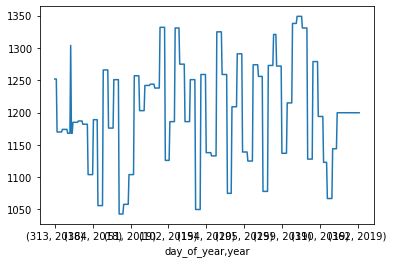

In [134]:
a = df_transactions[df_transactions['SKU'] == 16019]
a.set_index(['day_of_year', 'year'])['price'].plot()

In [65]:
df_transactions_

,SKU,price,year,month,week_num,quarter_of_year,day_of_year,day_of_month,day_of_week,is_wknd,is_month_start,is_month_end
12691,19703,3929.000000,2018,8,31,3,215,3,4,1,0,0
12696,19703,3929.000000,2018,8,31,3,216,4,5,1,0,0
12700,19703,3929.000000,2018,8,31,3,217,5,6,1,0,0
12705,19703,3930.000000,2018,8,32,3,218,6,0,0,0,0
12710,19703,3930.000000,2018,8,32,3,219,7,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9,19703,3944.519583,2019,12,52,4,359,25,2,0,0,0
9,19703,3944.519583,2019,12,52,4,360,26,3,0,0,0
9,19703,3944.519582,2019,12,52,4,361,27,4,1,0,0
9,19703,3944.519582,2019,12,52,4,362,28,5,1,0,0


In [66]:
df_update_

,SKU,year,month,week_num,quarter_of_year,day_of_year,day_of_month,day_of_week,is_wknd,is_month_start,is_month_end,price
9,19703,2019,12,1,4,364,30,0,0,0,0,3944.519582


In [72]:
df_test

,SKU,year,month,week_num,quarter_of_year,day_of_year,day_of_month,day_of_week,is_wknd,is_month_start,is_month_end,price
0,16019,2019,12,48,4,335,1,6,1,1,0,1199.764075
1,39544,2019,12,48,4,335,1,6,1,1,0,3546.293748
2,85915,2019,12,48,4,335,1,6,1,1,0,4445.156820
3,30482,2019,12,48,4,335,1,6,1,1,0,4156.058365
4,76988,2019,12,48,4,335,1,6,1,1,0,826.038383
...,...,...,...,...,...,...,...,...,...,...,...,...
5,58998,2019,12,1,4,364,30,0,0,0,0,892.091924
6,27600,2019,12,1,4,364,30,0,0,0,0,3216.459069
7,53038,2019,12,1,4,364,30,0,0,0,0,3093.429978
8,36487,2019,12,1,4,364,30,0,0,0,0,1611.261001


In [74]:
df_test[df_test['SKU'] == 85915]

,SKU,year,month,week_num,quarter_of_year,day_of_year,day_of_month,day_of_week,is_wknd,is_month_start,is_month_end,price
2,85915,2019,12,48,4,335,1,6,1,1,0,4445.156820
2,85915,2019,12,49,4,336,2,0,0,0,0,4445.155211
2,85915,2019,12,49,4,337,3,1,0,0,0,4445.156819
2,85915,2019,12,49,4,338,4,2,0,0,0,4445.156819
2,85915,2019,12,49,4,339,5,3,0,0,0,4445.158423
2,85915,2019,12,49,4,340,6,4,1,0,0,4445.158423
2,85915,2019,12,49,4,341,7,5,1,0,0,4445.156825
2,85915,2019,12,49,4,342,8,6,1,0,0,4445.155230
2,85915,2019,12,50,4,343,9,0,0,0,0,4445.158415
2,85915,2019,12,50,4,344,10,1,0,0,0,4445.156826


In [141]:
df_transactions = pd.concat([df_transactions, df_test]) 
df_transactions = df_transactions.sort_values(by=['SKU', 'year', 'month', 'week_num'])
df_transactions

,dates,SKU,price,year,month,week_num,quarter_of_year,day_of_year,day_of_month,day_of_week,is_wknd,is_month_start,is_month_end
1081480,2019-04-10,10060,2798.000000,2019,4,15,2,100,10,2,0,0,0
1081481,2019-04-10,10060,2798.000000,2019,4,15,2,100,10,2,0,0,0
1081482,2019-04-10,10060,2798.000000,2019,4,15,2,100,10,2,0,0,0
1081483,2019-04-11,10060,2798.000000,2019,4,15,2,101,11,3,0,0,0
1081484,2019-04-11,10060,2798.000000,2019,4,15,2,101,11,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
748582,2019-11-30,99996,813.000000,2019,11,48,4,334,30,5,1,0,1
748583,2019-11-30,99996,813.000000,2019,11,48,4,334,30,5,1,0,1
748584,2019-11-30,99996,813.000000,2019,11,48,4,334,30,5,1,0,1
748585,2019-11-30,99996,813.000000,2019,11,48,4,334,30,5,1,0,1


In [126]:
# %%time
# df_test = pd.DataFrame()


# for i in range(len(lst_sku)):
#     print(i)
#     df_transactions_ = df_transactions[df_transactions['SKU'] == lst_sku[i]]
    
#     Y_train = df_transactions_['price']
#     X_train = df_transactions_.drop(columns=['price'])

#     params = {
#         'learning_rate': 0.1
#     }

#     model = lgb.LGBMRegressor(**params)
#     model.fit(X_train, Y_train)
    
#     df_update_ = df_update[df_update['SKU'] == lst_sku[i]]
#     forecast = model.predict(df_update_)
#     df_update_['price'] = forecast
#     df_test = pd.concat([df_test, df_update_])   

In [89]:
Y_train = df_transactions['price']
X_train = df_transactions.drop(columns=['price'])
    
params = {
#     'n_estimators': 1000,
#     'max_depth': 7,
    'learning_rate': 0.1
}

model = lgb.LGBMRegressor(**params)
model.fit(X_train, Y_train)

LGBMRegressor()

In [49]:
# X_test = df_primer_batch
# forecast = model.predict(X_test)
# df['price'] = forecast

In [90]:
lst_sku = df_transactions.SKU.unique().tolist()
dec =['2019-12-01', '2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05',
'2019-12-06', '2019-12-07', '2019-12-08', '2019-12-09', '2019-12-10',
'2019-12-11', '2019-12-12', '2019-12-13', '2019-12-14', '2019-12-15',
'2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
'2019-12-21', '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
'2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30']

df_update = pd.DataFrame(lst_sku, columns =['SKU'])
df_update['dates'] = dec[0]
df_update['dates'] = pd.to_datetime(df_update['dates'])

df_update['year'] = df_update.dates.dt.year
df_update['month'] = df_update.dates.dt.month
df_update['week_num'] = df_update.dates.dt.isocalendar().week.astype(int)

df_update = date_to_datetime(df_update)
df_update = df_update[df_update['SKU'] == 16019]
df_update

,SKU,year,month,week_num,quarter_of_year,day_of_year,day_of_month,day_of_week,is_wknd,is_month_start,is_month_end
0,16019,2019,12,48,4,335,1,6,1,1,0


In [91]:
forecast = model.predict(df_update)
df_update['price'] = forecast
df_update

,SKU,year,month,week_num,quarter_of_year,day_of_year,day_of_month,day_of_week,is_wknd,is_month_start,is_month_end,price
0,16019,2019,12,48,4,335,1,6,1,1,0,1115.752705


In [45]:
df_transactions = pd.read_csv('transactions.csv')
df_transactions[df_transactions['SKU'] == 39483]

,dates,SKU,user,price
473694,2019-10-30,39483,46814,382.0
473695,2019-10-30,39483,45755,382.0
473696,2019-10-30,39483,48952,382.0
473697,2019-10-30,39483,19631,382.0
473698,2019-10-30,39483,11622,382.0
...,...,...,...,...
473850,2019-11-30,39483,48006,390.0
473851,2019-11-30,39483,40044,390.0
473852,2019-11-30,39483,45581,390.0
473853,2019-11-30,39483,22105,390.0


In [14]:
UUID = '278a6454351246b696fd4a2bf5aec4d9'

URL_BEGIN_DATA = 'https://lab.karpov.courses/hardml-api/project-1/task/{uuid}/begin'
req = requests.post(URL_BEGIN_DATA.format(uuid=UUID))
print(req.json())

for i in range(31):
    print(f"number {i}")

    URL_TASK_DATA_GET = 'https://lab.karpov.courses/hardml-api/project-1/task/{uuid}/data'
    response = requests.get(URL_TASK_DATA_GET.format(uuid=UUID))
    print(response)

#     df_transactions = pd.read_csv('transactions.csv')
#     df_transactions['dates'] = pd.to_datetime(df_transactions['dates'])
#     df_transactions['year'] = df_transactions.dates.dt.year
#     df_transactions['month'] = df_transactions.dates.dt.month
#     df_transactions['week_num'] = df_transactions.dates.dt.weekofyear

#     df_wholesale_trade_table = pd.read_csv('wholesale_trade_table.csv')

#     df_price_cost = pd.merge(df_transactions, df_wholesale_trade_table,
#                              how='left', on=['SKU', 'year',
#                                              'month', 'week_num'])

#     df_price_cost = date_to_datetime(df_price_cost)

    df = pd.read_json(response.json())
    df_primer_batch = df.copy()
    df_primer_batch['dates'] = pd.to_datetime(df_primer_batch['dates'])

    df_primer_batch['year'] = df_primer_batch.dates.dt.year
    df_primer_batch['month'] = df_primer_batch.dates.dt.month
    df_primer_batch['week_num'] = df_primer_batch.dates.dt.isocalendar().week

    df_primer_batch = pd.merge(df_primer_batch, df_wholesale_trade_table,
                               how='left', on=['SKU', 'year',
                                               'month', 'week_num'])

    df_primer_batch = date_to_datetime(df_primer_batch)

#     Y_train = df_price_cost['price']
#     X_train = df_price_cost.drop(columns=['price'])

    X_test = df_primer_batch


#     params = {
#         'n_estimators': 1500,
#         'max_depth': 5,
#         'learning_rate': 0.1,
#     }

#     model = lgb.LGBMRegressor(first_metric_only = True, **params)
#     model.fit(X_train, Y_train,
#               verbose = 0)

    forecast = model.predict(X_test)

    df['price'] = forecast

    URL_TASK_RESULT_POST = 'https://lab.karpov.courses/hardml-api/project-1/task/{uuid}/result/'
    response_receive = requests.post(URL_TASK_RESULT_POST.format(uuid=UUID),
                                     data=df[['dates', 'SKU', 'user_id', 'price']].to_json(orient='records'))

    print(response_receive.json()['status'])

#     break

{'status': 'ok'}
number 0
<Response [200]>
ok
number 1
<Response [200]>
ok
number 2
<Response [200]>
ok
number 3
<Response [200]>
ok
number 4
<Response [200]>
ok
number 5
<Response [200]>
ok
number 6
<Response [200]>
ok
number 7
<Response [200]>
ok
number 8
<Response [200]>
ok
number 9
<Response [200]>
ok
number 10
<Response [200]>
ok
number 11
<Response [200]>
ok
number 12
<Response [200]>
ok
number 13
<Response [200]>
ok
number 14
<Response [200]>
ok
number 15
<Response [200]>
ok
number 16
<Response [200]>
ok
number 17
<Response [200]>
ok
number 18
<Response [200]>
ok
number 19
<Response [200]>
ok
number 20
<Response [200]>
ok
number 21
<Response [200]>
ok
number 22
<Response [200]>
ok
number 23
<Response [200]>
ok
number 24
<Response [200]>
ok
number 25
<Response [200]>
ok
number 26
<Response [200]>
ok
number 27
<Response [200]>
ok
number 28
<Response [200]>
ok
number 29
<Response [200]>
ok
number 30
<Response [200]>


ValueError: Invalid file path or buffer object type: <class 'dict'>

In [23]:
print(response.json()['status'])

batch processing finished


In [57]:
URL_TASK_RESULT_GET = 'https://lab.karpov.courses/hardml-api/project-1/task/{uuid}/result'
response = requests.get(URL_TASK_RESULT_GET.format(uuid=UUID))

# Чтобы перевести полученный ответ в pd.DataFrame
df = pd.read_json(response.json())
df.head()

,dates,SKU,user_id,price,bought
0,2019-12-01,16019,32813,1040.411870,1
1,2019-12-01,84011,55841,4062.875107,0
2,2019-12-01,84011,16345,4062.875107,0
3,2019-12-01,29011,12544,2268.398158,0
4,2019-12-01,79558,49751,2577.125468,0


In [58]:
df_1 = df[df['bought'] == 1]
df_1.head()

,dates,SKU,user_id,price,bought
0,2019-12-01,16019,32813,1040.411870,1
6,2019-12-01,86541,33723,2712.497225,1
8,2019-12-01,46933,47630,1877.036381,1
9,2019-12-01,46933,15774,1877.036381,1
13,2019-12-01,41955,11117,2997.356091,1


In [66]:
df_1[df_1['SKU'] == 86541]

,dates,SKU,user_id,price,bought
6,2019-12-01,86541,33723,2712.497225,1
691,2019-12-01,86541,12863,2712.497225,1
693,2019-12-01,86541,22311,2712.497225,1
2425,2019-12-01,86541,32259,2712.497225,1
3462,2019-12-01,86541,45202,2712.497225,1
...,...,...,...,...,...
284291,2019-12-30,86541,41127,2708.882155,1
287469,2019-12-30,86541,46909,2708.882155,1
287480,2019-12-30,86541,14479,2708.882155,1
287490,2019-12-30,86541,38135,2708.882155,1


In [67]:
df_0[df_0['SKU'] == 86541]

,dates,SKU,user_id,price,bought
5,2019-12-01,86541,30649,2712.497225,0
692,2019-12-01,86541,91116,2712.497225,0
2085,2019-12-01,86541,49475,2712.497225,0
7666,2019-12-01,86541,44093,2712.497225,0
9017,2019-12-01,86541,38612,2712.497225,0
...,...,...,...,...,...
283418,2019-12-30,86541,29869,2708.882155,0
283425,2019-12-30,86541,39397,2708.882155,0
284279,2019-12-30,86541,33960,2708.882155,0
284340,2019-12-30,86541,36919,2708.882155,0


In [60]:
df_0 = df[df['bought'] == 0]
df_0.head()

,dates,SKU,user_id,price,bought
1,2019-12-01,84011,55841,4062.875107,0
2,2019-12-01,84011,16345,4062.875107,0
3,2019-12-01,29011,12544,2268.398158,0
4,2019-12-01,79558,49751,2577.125468,0
5,2019-12-01,86541,30649,2712.497225,0


In [61]:
len(df_0.SKU.unique())

826

In [62]:
df_0.price.sum()

358676192.4784469

In [63]:
df_1.price.sum()

257251407.59074932

In [ ]:
266.710.705